<a href="https://colab.research.google.com/github/deepika-2411/Mini-Project-BigMart-Sales-Predictive-Analysis/blob/main/Copy_of_Big_Mart_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.



# **Hypothesis Generation**


**City type:** Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.

**Competitors:** Stores having similar establishments nearby should have less sales because of more competition.

**Brand:** Branded products should have higher sales because of higher trust in the customer.

**Packaging:** Products with good packaging can attract customers and sell more.

**Utility:** Daily use products should have a higher tendency to sell as compared to the specific use products.

**Family Size:** More the number of family members, more amount will be spent by a customer to buy products.

**Annual Income:** Higher the annual income of a customer, customer is more likely to buy high cost products. Past Purchase History: Availablity of this information can help us to determine the frequency of a product being purchased by a user.


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
df1 = pd.read_csv('/content/drive/MyDrive/Train.csv',encoding='ISO-8859-1')
df2=pd.read_csv('/content/drive/MyDrive/Test.csv',encoding='ISO-8859-1')


In [ ]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df1.shape

(8523, 12)

In [ ]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [ ]:
# Dataset Duplicate Value Count
len(df1[df1.duplicated()])

0

There  were no duplicated value found here

In [ ]:
# Missing Values/Null Values Count
df1.isna().sum()
df2.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

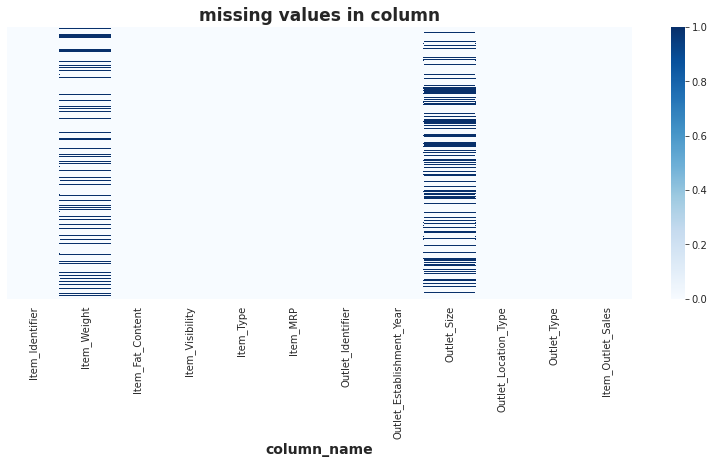

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df1.isnull(), cbar=True, yticklabels=False,cmap="Blues")
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [ ]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#Removing NULL values from all the columns

In [ ]:
df1['Item_Weight']=df1['Item_Weight'].fillna(df1['Item_Weight'].mean())


In [ ]:
df2['Item_Weight']=df2['Item_Weight'].fillna(df2['Item_Weight'].mean())


In [ ]:
df1['Outlet_Size']=df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0])


In [ ]:
df2['Outlet_Size']=df2['Outlet_Size'].fillna(df2['Outlet_Size'].mode()[0])


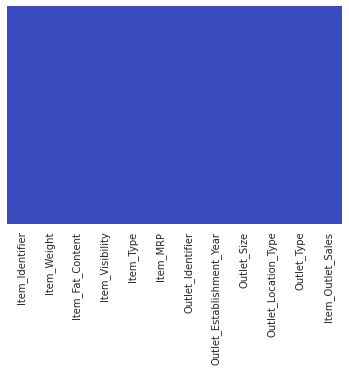

In [ ]:
#Lets check whether we still have missing values in our dataset!!
import seaborn as sns
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')


Looks like there is no more missing value exist!



#Exploratory Data Analysis

#Univariate Analysis

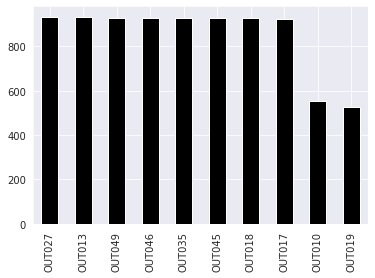

In [ ]:
#Visualizing the "Outlet_Identifier"
df1['Outlet_Identifier'].value_counts().plot(kind='bar',color = 'Black')


1.   OUT027 has maximum outlet sales.
2.   OUT019 and OUT019 have least outlet sales among all.


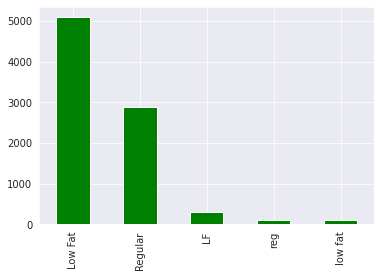

In [ ]:
#Visualizing the "Item_Fat_Content"
df1['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'Green')


In [ ]:
df1 =  df1.replace(to_replace ="low fat",  value ="Low Fat") 
df1 =  df1.replace(to_replace ="LF",  value ="Low Fat") 
df1 =  df1.replace(to_replace ="reg",  value ="Regular") 


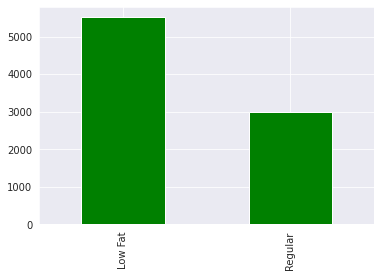

In [ ]:
#Visualizing the "Item_Fat_Content"
df1['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'Green')


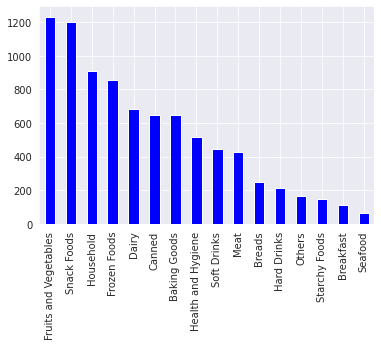

In [ ]:
#Visualizing the "Item_Type"
df1['Item_Type'].value_counts().plot(kind='bar',color = 'Blue')


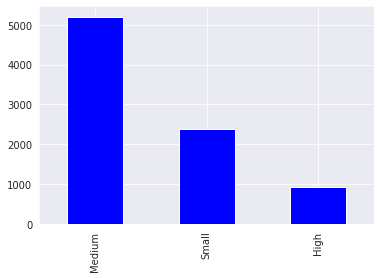

In [ ]:
#Visualizing the "Outlet_Size"
df1['Outlet_Size'].value_counts().plot(kind='bar',color = 'Blue')


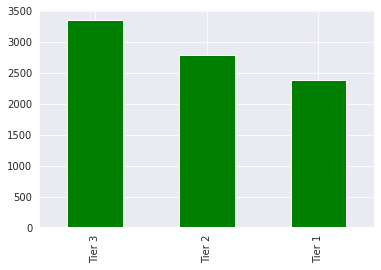

In [ ]:
#Visualizing the "Outlet_Location_Type"
df1['Outlet_Location_Type'].value_counts().plot(kind='bar',color = 'Green')


1.   Most of the Outlet are located in Tier 3.
2.   Tier 2 location is second most after Tier 3.


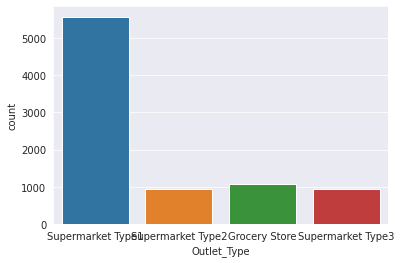

In [ ]:
#Visualizing the "Outlet_Type"
sns.countplot(df1['Outlet_Type'])


1.   Most Outlets are Supermarkets of type 1
2.   There is Significant amount of Outlets which are Grocery store. 


#Lets check the individual Int/float Variables


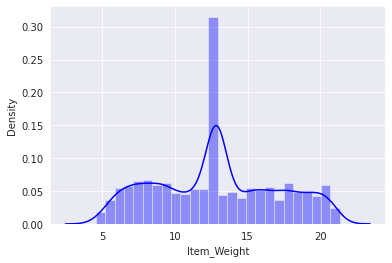

In [ ]:
y = df1['Item_Weight']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'blue')


Most of the items have weight in range of 8-16. 
The mode of weight is near to 13.

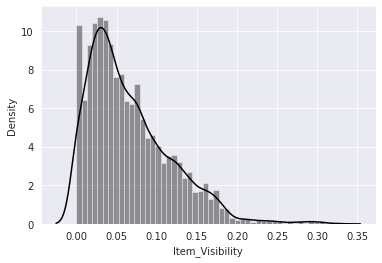

In [ ]:
y = df1['Item_Visibility']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'black')


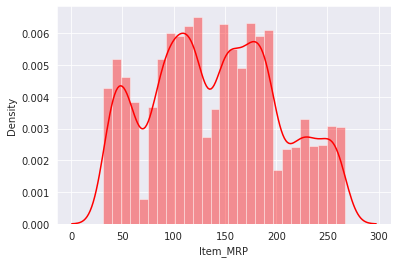

In [ ]:
y = df1['Item_MRP']
plt.figure(1);
sns.distplot(y, kde=True,color = 'red')


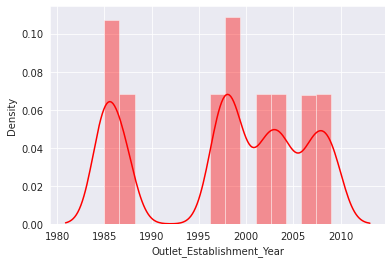

In [ ]:
y = df1['Outlet_Establishment_Year']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'red')


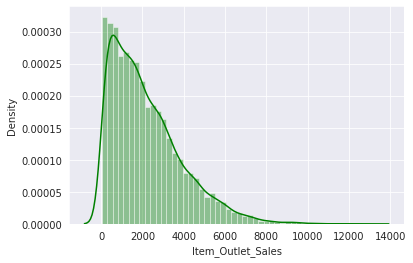

In [ ]:
y = df1['Item_Outlet_Sales']
plt.figure(1);
sns.distplot(y, kde=True,color = 'green')


 We can see that the Outlet_sales is normally distributed with right skewness.

In [ ]:
df1["Qty_Sold"] = (df1["Item_Outlet_Sales"]/df1["Item_MRP"])
df1.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Qty_Sold
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,4.021967
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868


#Bi-variate Analyis

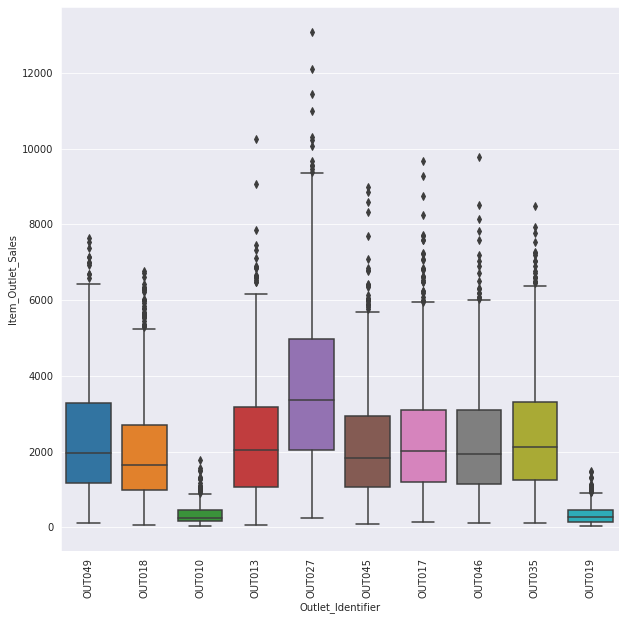

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(x=df1['Outlet_Identifier'], y=df1['Item_Outlet_Sales']);
plt.xticks(rotation = 90)
plt.show()


1.   OUT027 has maximum outlet sales.
2.   OUT049 and OUT019 have least outlet sales among all.


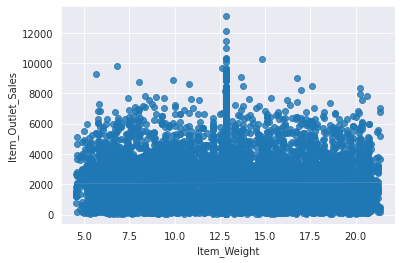

In [ ]:
sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=df1)

The plot show that outlet sales has less co-relation with item weight.

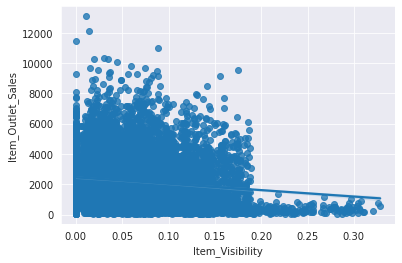

In [ ]:
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df1)

1.   There is significant co-relation between Item_visibility and outlet sales.
2.   The visbility range 0.00-0.20 has maximum outlet sales.


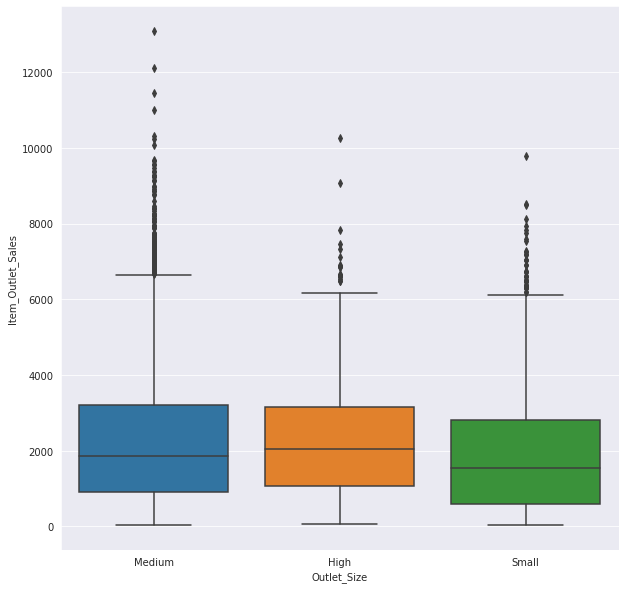

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df1)

 The plot shows the relation of Outlet size with outlet sales.

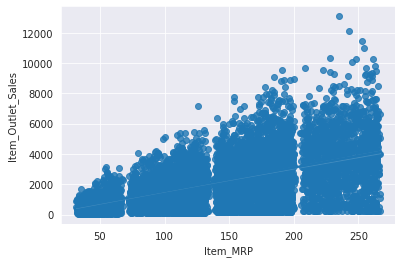

In [ ]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=df1)

In [ ]:
df1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Qty_Sold
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550,-0.009103
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625,-0.161024
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574,0.011144
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135,-0.074536
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000,0.759315
Qty_Sold,-0.009103,-0.161024,0.011144,-0.074536,0.759315,1.000000


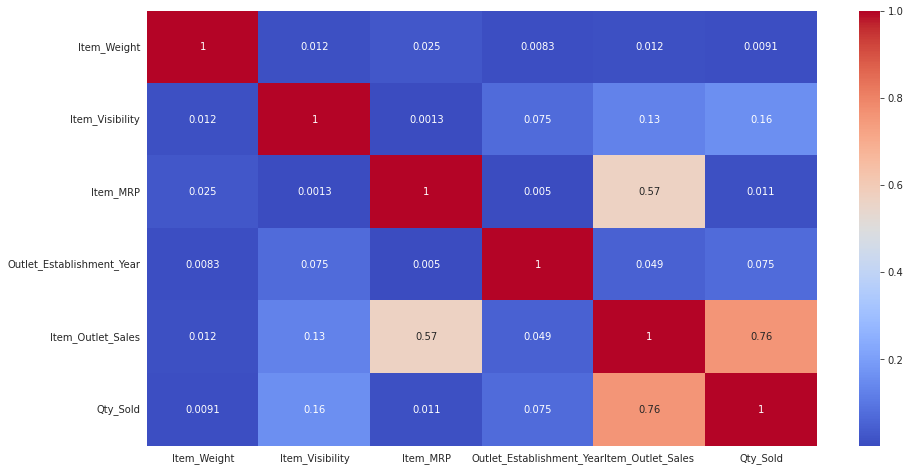

In [ ]:
## Correlation 
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

1.   The plot shows that more the price of item, the better is its outlet sale.
2.   The relation is almost linear.


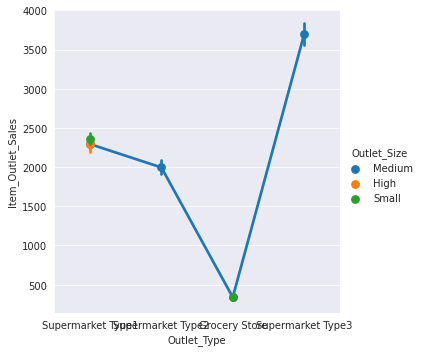

In [ ]:
sns.factorplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',data=df1)

#Feature Engineeering

#Converting categorical data into numerical


In [ ]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
def fun(x):
  if x=='Low Fat':
    return(0)
  else:
    return(1)

In [ ]:
df1['Item_Fat_Content']=df1['Item_Fat_Content'].apply(fun)
df2['Item_Fat_Content']=df2['Item_Fat_Content'].apply(fun)
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,1,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,1,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,1,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [ ]:
df1['Item_Fat_Content'].head()

0    0
1    1
2    0
3    1
4    0
Name: Item_Fat_Content, dtype: int64

In [ ]:
df1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
df1['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [ ]:
def fun1(x):
  if x=='Medium':
    return(0)
  elif x=='High':
    return(1)
  else:
    return(2)

In [ ]:
df1['Outlet_Size']=df1['Outlet_Size'].apply(fun1)
df2['Outlet_Size']=df2['Outlet_Size'].apply(fun1)

In [ ]:
df1['Outlet_Size'].head()

0    0
1    0
2    0
3    0
4    1
Name: Outlet_Size, dtype: int64

In [ ]:
df1['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
def fun2(x):
  if x=='Tier 1':
    return(0)
  elif x=='Tier 2':
    return(1)
  else:
    return(2)

In [ ]:
df1['Outlet_Location_Type']=df1['Outlet_Location_Type'].apply(fun2)
df2['Outlet_Location_Type']=df2['Outlet_Location_Type'].apply(fun2)

In [ ]:
df1['Outlet_Location_Type'].head()

0    0
1    2
2    0
3    2
4    2
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
def fun3(x):
  if x=='Supermarket Type1':
    return(0)
  elif x=='Supermarket Type2':
    return(1)
  elif x=='Supermarket Type3':
    return(2)
  else:
    return(3)

In [ ]:
df1['Outlet_Type']=df1['Outlet_Type'].apply(fun3)
df2['Outlet_Type']=df2['Outlet_Type'].apply(fun3)

In [ ]:
df1['Outlet_Type'].head()

0    0
1    1
2    0
3    3
4    0
Name: Outlet_Type, dtype: int64

In [ ]:
df1['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

#One hot encoding

In [ ]:
df=pd.get_dummies(df1['Outlet_Identifier'])

df

,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8518,0,1,0,0,0,0,0,0,0,0
8519,0,0,0,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,1,0,0,0
8521,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_=pd.get_dummies(df2['Outlet_Identifier'])
df_

,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5676,0,0,0,0,0,0,0,0,1,0
5677,0,0,0,1,0,0,0,0,0,0
5678,0,0,0,0,0,0,0,1,0,0
5679,0,0,1,0,0,0,0,0,0,0


In [ ]:
df1=pd.concat([df1,df],axis=1)

In [ ]:
df2=pd.concat([df2,df_],axis=1)

In [ ]:
df2.drop('Outlet_Identifier',axis=1).head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,1999,0,0,0,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,2007,0,1,0,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600000,0,0.099575,Others,241.7538,1998,0,2,3,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,2007,0,1,0,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,1985,0,2,2,0,0,0,0,0,1,0,0,0,0


In [ ]:
df1.drop('Outlet_Identifier',axis=1).head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,FDA15,9.30,0,0.016047,Dairy,249.8092,1999,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,2009,0,2,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,1999,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,1998,0,2,3,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,1987,1,2,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Qty_Sold', 'OUT010', 'OUT013',
       'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046',
       'OUT049'],
      dtype='object')

In [ ]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,0,2,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,2,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,1,2,...,0,1,0,0,0,0,0,0,0,0


#Feature selection

 From the co-relation map we plotted before, we can see that there almost no co-relation between 'Item_Identifier', 'Item_type' and 'Outlet_Establishment_year' with our target i.e 'Item_Outlet_sales'

So we will drop these columns and will not use in training out model.

#Assigning data to X and Y variable

In [ ]:
x=df1.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year','Item_Outlet_Sales','Outlet_Identifier'],axis=1)
y=df1['Item_Outlet_Sales']

In [ ]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,0,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,0,1,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,0,2,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,0,1,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,0,2,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Qty_Sold,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,9.30,0,0.016047,249.8092,0,0,0,14.951963,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019278,48.2692,0,2,1,9.186454,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,0,0,0,14.809346,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.000000,182.0950,0,2,3,4.021967,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1,2,0,18.467868,0,1,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

#Training Testing and splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,classification_report,confusion_matrix

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
predicted=lr.predict(x_test)

In [ ]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",lr.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 356344.6343434667
MEAN ABSOLUTE ERROR(MAE) 393.7519546725034
ROOT MEAN SQUARED ERROR(RMSE) 596.9460899808848
SCORE 0.8833353915188811


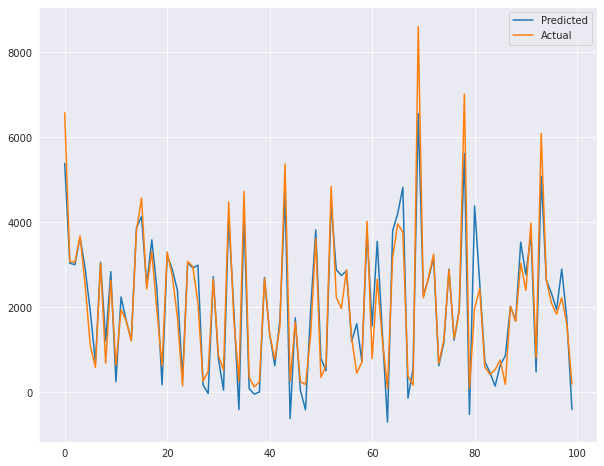

In [ ]:
  plt.figure(figsize=(10,8))
  plt.plot((predicted)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()


#Regularised Regression

# Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
lasso.score(x_train, y_train)

0.8910030636436786

In [ ]:
predicted1 = lasso.predict(x_test)

In [ ]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted1))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted1))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted1)))
print("SCORE",lasso.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 356249.3107705084
MEAN ABSOLUTE ERROR(MAE) 393.5760689516118
ROOT MEAN SQUARED ERROR(RMSE) 596.8662419424543
SCORE 0.8833665997545226


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfg=RandomForestRegressor()

In [ ]:
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
predicted2=rfg.predict(x_test)

In [ ]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted2))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted2))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted2)))
print("SCORE",rfg.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 4084.0077627061714
MEAN ABSOLUTE ERROR(MAE) 23.092884453958977
ROOT MEAN SQUARED ERROR(RMSE) 63.90624196982773
SCORE 0.9986629259409285


# Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(x_train, y_train)

0.8910048915730928

In [ ]:
predicted4 = ridge.predict(x_test)

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -314481.62986494205


In [ ]:
y_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
ridge.fit(x_train,y_train)

Ridge()

In [ ]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,y_pred_ridge))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,y_pred_ridge))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,y_pred_ridge)))
print("SCORE",ridge.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 356317.1458969394
MEAN ABSOLUTE ERROR(MAE) 393.71057170512404
ROOT MEAN SQUARED ERROR(RMSE) 596.9230653082014
SCORE 0.8833443910337966


# AdaBoost Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
abr=AdaBoostRegressor(n_estimators=70)

In [ ]:
abr.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=70)

In [ ]:
predicted3=abr.predict(x_test)

In [ ]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted3))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted3))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted3)))
print("SCORE",abr.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 170063.04288779318
MEAN ABSOLUTE ERROR(MAE) 343.1705860943625
ROOT MEAN SQUARED ERROR(RMSE) 412.3870062062979
SCORE 0.9443226124278082


##Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
br=BaggingRegressor(n_estimators=30)

In [ ]:
br.fit(x_train,y_train)

BaggingRegressor(n_estimators=30)

In [ ]:
predicted3=br.predict(x_test)

In [ ]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted3))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted3))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted3)))
print("SCORE",br.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 4547.703455209283
MEAN ABSOLUTE ERROR(MAE) 24.746503863147613
ROOT MEAN SQUARED ERROR(RMSE) 67.43666254500799
SCORE 0.9985111153867443


# Comparing all Models and finding the best one.

1.   Linear Regression  score: 0.88
2.   Random Forest Regression  Score: 0.998
1.   AdaBoost Regression Score: 0.94
2.   Bagging Regressor  Score 0.997


# **Final Predictions On The Test Dataset**

In [ ]:
df2=df2.drop(['Item_Identifier','Item_Type','Outlet_Identifier'],axis=1)

In [ ]:
result_prediction=rfg.predict(df2)
result_prediction

array([108.372266,  86.207784, 731.14827 , ..., 119.204832, 217.536834,
        80.468588])

In [ ]:
df2['result'] =pd.Series(result_prediction)
df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,result
0,20.750000,0,0.007565,107.8622,1999,0,0,0,0,0,0,0,0,0,0,0,0,1,108.372266
1,8.300000,1,0.038428,87.3198,2007,0,1,0,0,0,1,0,0,0,0,0,0,0,86.207784
2,14.600000,0,0.099575,241.7538,1998,0,2,3,1,0,0,0,0,0,0,0,0,0,731.148270
3,7.315000,0,0.015388,155.0340,2007,0,1,0,0,0,1,0,0,0,0,0,0,0,154.525522
4,12.695633,1,0.118599,234.2300,1985,0,2,2,0,0,0,0,0,1,0,0,0,0,466.259740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,141.3154,1997,2,0,0,0,0,0,0,0,0,0,0,1,0,141.415920
5677,7.600000,1,0.142991,169.1448,2009,0,2,1,0,0,0,1,0,0,0,0,0,0,170.238402
5678,10.000000,0,0.073529,118.7440,2002,0,1,0,0,0,0,0,0,0,0,1,0,0,119.204832
5679,15.300000,1,0.000000,214.6218,2007,0,1,0,0,0,1,0,0,0,0,0,0,0,217.536834


# Summary

Firstly we studied about the dataset i.e Big Mart Sales Analysis and understood the meaning of each columns. Then we performed Exploratory Data Analysis on our dataset. We plotted various Univariate and Bi-variate plots to study the relationship between various features. Then we cleaned our data and also performed feature enginnering.                                                                                              
We trained our model and predicted values for Outlet_sales. Evaluation was done to find out the best model.

and we have seen random forest model given best accuracy so we choose random forest model for deployment on test dataset.